In [2]:
import os
os.listdir()



['.ipynb_checkpoints',
 'data',
 'online_retail.csv.zip',
 'Untitled Folder',
 'Untitled.ipynb']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("online_retail.csv.zip", compression='zip')

# Show first 5 rows
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
data.shape


(541909, 8)

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
# Remove missing values
data = data.dropna()

# Keep only positive quantity
data = data[data['Quantity'] > 0]

# Create TotalPrice column
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


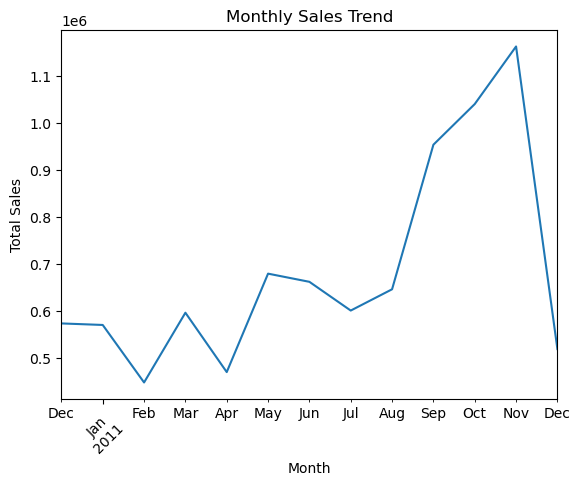

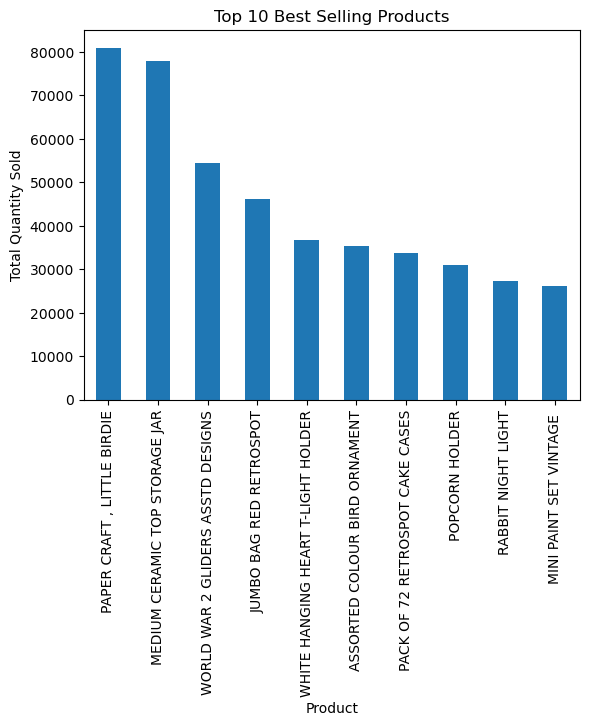

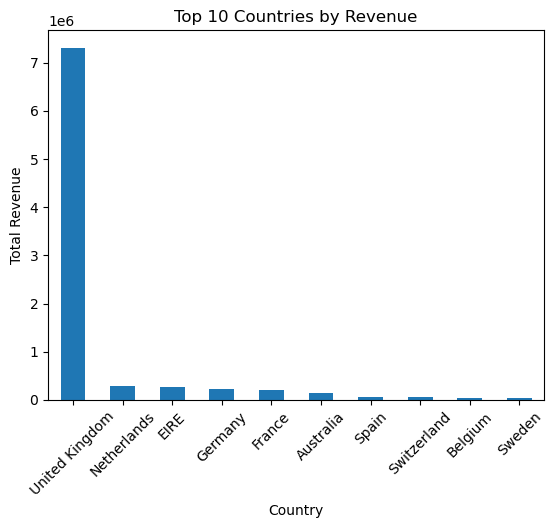

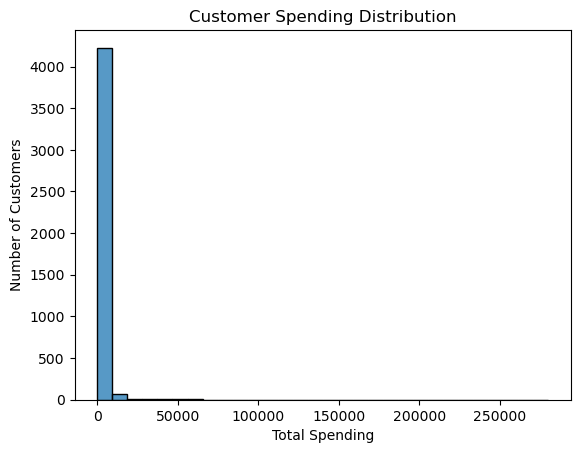

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure column names are clean
data.columns = data.columns.str.strip()

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create Month-Year column
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')

# -----------------------------------------
# 1️⃣ Monthly Sales Trend
# -----------------------------------------

monthly_sales = data.groupby('MonthYear')['TotalPrice'].sum()

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# -----------------------------------------
# 2️⃣ Top 10 Best Selling Products
# -----------------------------------------

top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_products.plot(kind='bar')
plt.title("Top 10 Best Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=90)
plt.show()

# -----------------------------------------
# 3️⃣ Top 10 Revenue Generating Countries
# -----------------------------------------

top_countries = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# -----------------------------------------
# 4️⃣ Customer Purchase Distribution
# -----------------------------------------

customer_spending = data.groupby('CustomerID')['TotalPrice'].sum()

plt.figure()
sns.histplot(customer_spending, bins=30)
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.show()



In [11]:
import requests
import pandas as pd

def fetch_product_data():
    url = "https://fakestoreapi.com/products"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        
        df = pd.DataFrame(data)
        
        # Save to CSV
        df.to_csv("api_product_data.csv", index=False)
        
        print("Data successfully collected from API and saved as api_product_data.csv")
        print(df.head())
    else:
        print("Failed to fetch data")

if __name__ == "__main__":
    fetch_product_data()


Data successfully collected from API and saved as api_product_data.csv
   id                                              title   price  \
0   1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...  109.95   
1   2             Mens Casual Premium Slim Fit T-Shirts    22.30   
2   3                                 Mens Cotton Jacket   55.99   
3   4                               Mens Casual Slim Fit   15.99   
4   5  John Hardy Women's Legends Naga Gold & Silver ...  695.00   

                                         description        category  \
0  Your perfect pack for everyday use and walks i...  men's clothing   
1  Slim-fitting style, contrast raglan long sleev...  men's clothing   
2  great outerwear jackets for Spring/Autumn/Wint...  men's clothing   
3  The color could be slightly different between ...  men's clothing   
4  From our Legends Collection, the Naga was insp...        jewelery   

                                               image  \
0  https://fakestoreapi.com/img

RFM Table Preview:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        1          7   4310.00
2     12348.0       74          4   1797.24
3     12349.0       18          1   1757.55
4     12350.0      309          1    334.40


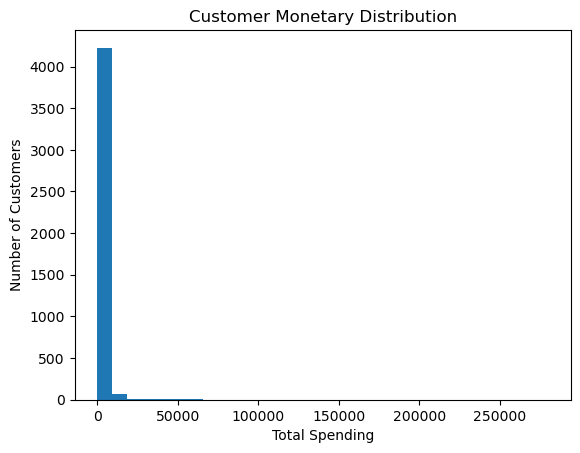

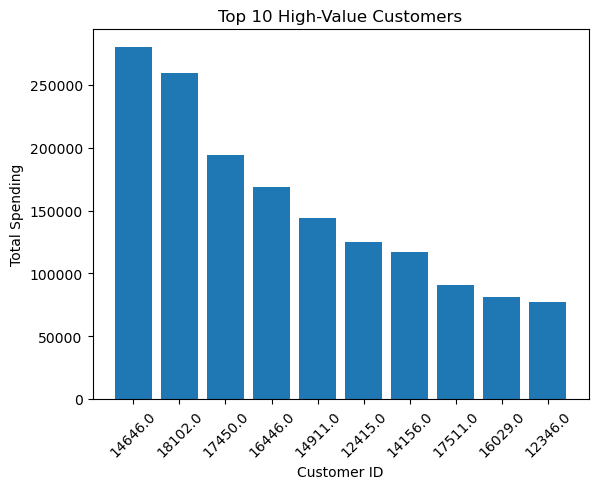

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure column names are clean
data.columns = data.columns.str.strip()

# Convert date column to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create TotalPrice column if not already created
if 'TotalPrice' not in data.columns:
    data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# -----------------------------------------
# 1️⃣ Create Snapshot Date (Latest date in dataset)
# -----------------------------------------
snapshot_date = data['InvoiceDate'].max()

# -----------------------------------------
# 2️⃣ Calculate RFM Metrics
# -----------------------------------------

rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm = rfm.reset_index()

print("RFM Table Preview:")
print(rfm.head())

# -----------------------------------------
# 3️⃣ Visualize Customer Spending Distribution
# -----------------------------------------

plt.figure()
plt.hist(rfm['Monetary'], bins=30)
plt.title("Customer Monetary Distribution")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.show()

# -----------------------------------------
# 4️⃣ Top 10 High-Value Customers
# -----------------------------------------

top_customers = rfm.sort_values(by='Monetary', ascending=False).head(10)

plt.figure()
plt.bar(top_customers['CustomerID'].astype(str), top_customers['Monetary'])
plt.title("Top 10 High-Value Customers")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()


   CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      325          1  77183.60        0
1     12347.0        1          7   4310.00        3
2     12348.0       74          4   1797.24        3
3     12349.0       18          1   1757.55        3
4     12350.0      309          1    334.40        1


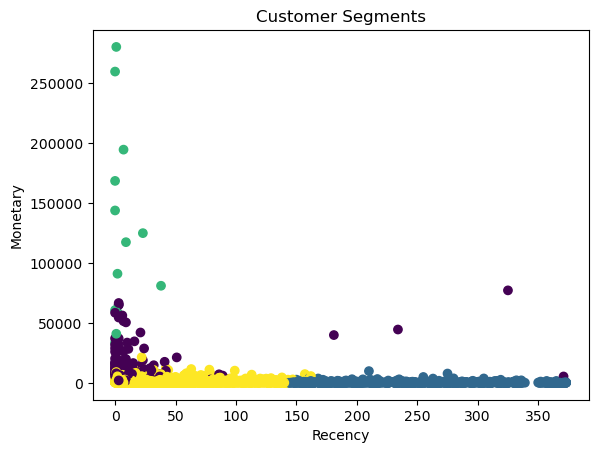

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select RFM features
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

print(rfm.head())

# Visualize clusters (Recency vs Monetary)
plt.figure()
plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Cluster'])
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.title("Customer Segments")
plt.show()


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("online_retail.csv.zip", compression='zip')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df = pd.read_csv("online_retail.csv.zip", compression='zip')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [14]:
df = pd.read_csv("online_retail.csv.zip", compression='zip')

df.dropna(inplace=True)

df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [15]:
rfm = rfm.reset_index()
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

rfm_scaled = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])

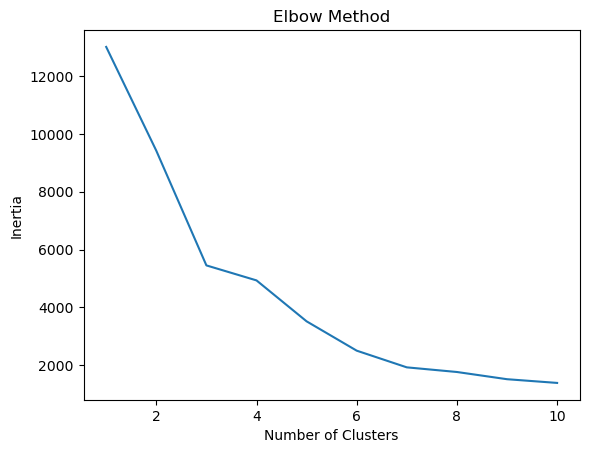

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)

rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,3
1,12347.0,2,182,4310.00,0
2,12348.0,75,31,1797.24,1
3,12349.0,19,73,1757.55,0
4,12350.0,310,17,334.40,3


In [19]:
rfm.groupby('Cluster').mean()

,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,15293.225702,20.990788,135.285122,2645.818172
1,15303.379336,98.218703,37.719457,773.877083
2,15286.307692,4.692308,2565.307692,126118.310000
3,15314.702899,272.407005,25.138889,605.842525


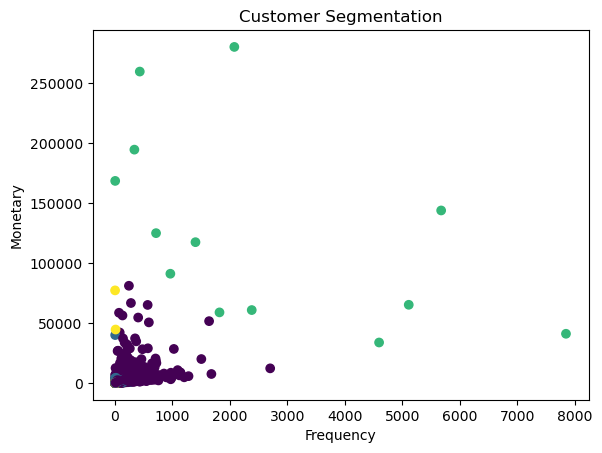

In [20]:
plt.scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'])
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.title("Customer Segmentation")
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,1
1,12347.0,2,182,4310.00,0
2,12348.0,75,31,1797.24,0
3,12349.0,19,73,1757.55,0
4,12350.0,310,17,334.40,1


In [22]:
cluster_summary = rfm.groupby('Cluster').mean()
cluster_summary

,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,15284.551618,41.377196,103.089060,2028.833862
1,15348.220370,247.308333,27.787963,637.318510
2,15286.307692,4.692308,2565.307692,126118.310000


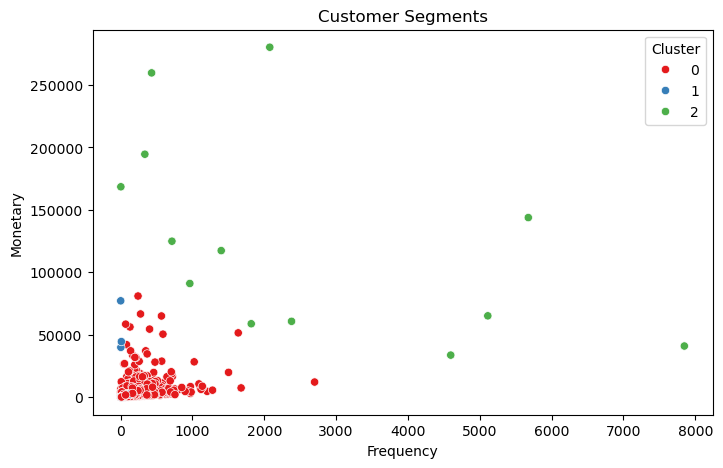

In [23]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=rfm['Frequency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette='Set1')
plt.title("Customer Segments")
plt.show()

In [24]:
def create_rfm(df):
    
    df = df.dropna()
    df = df[df['Quantity'] > 0]
    df = df[df['UnitPrice'] > 0]
    
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
    
    snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
    
    rfm = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalPrice': 'sum'
    })
    
    rfm.columns = ['Recency', 'Frequency', 'Monetary']
    
    return rfm

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("online_retail.csv.zip", compression='zip')

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,3
1,12347.0,2,182,4310.00,0
2,12348.0,75,31,1797.24,1
3,12349.0,19,73,1757.55,0
4,12350.0,310,17,334.40,3


In [28]:
rfm.groupby('Cluster').mean()

,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,15293.225702,20.990788,135.285122,2645.818172
1,15303.379336,98.218703,37.719457,773.877083
2,15286.307692,4.692308,2565.307692,126118.310000
3,15314.702899,272.407005,25.138889,605.842525


In [29]:
def segment_customer(row):
    if row['Cluster'] == 0:
        return 'High Value'
    elif row['Cluster'] == 1:
        return 'Regular'
    elif row['Cluster'] == 2:
        return 'At Risk'
    else:
        return 'Low Value'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,326,1,77183.60,3,Low Value
1,12347.0,2,182,4310.00,0,High Value
2,12348.0,75,31,1797.24,1,Regular
3,12349.0,19,73,1757.55,0,High Value
4,12350.0,310,17,334.40,3,Low Value


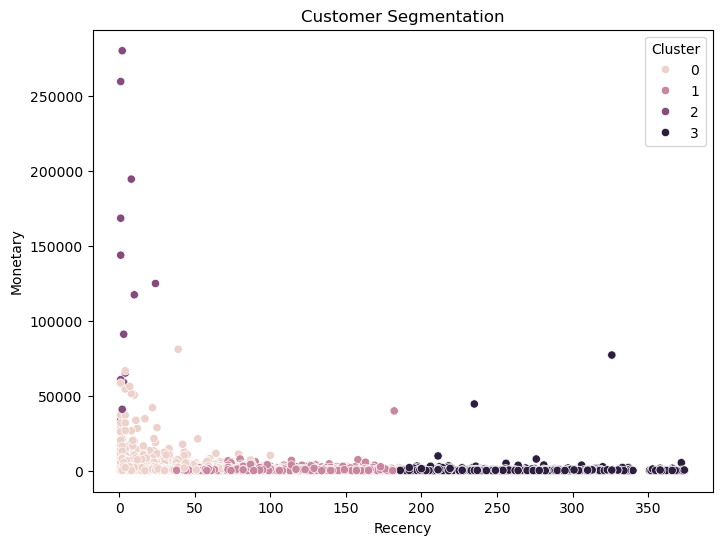

In [30]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm)
plt.title("Customer Segmentation")
plt.show()

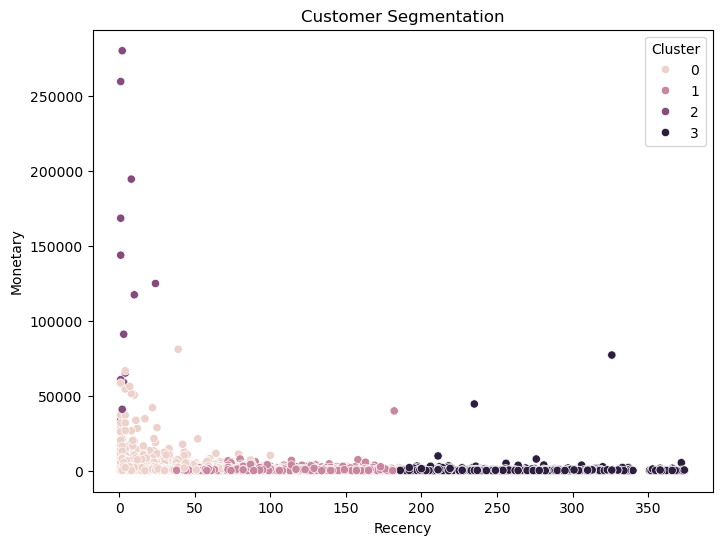

In [31]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm)
plt.title("Customer Segmentation")
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

pipeline.fit(rfm[['Recency', 'Frequency', 'Monetary']])

rfm['Cluster_Pipeline'] = pipeline.predict(rfm[['Recency', 'Frequency', 'Monetary']])

rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment,Cluster_Pipeline
0,12346.0,326,1,77183.60,3,Low Value,3
1,12347.0,2,182,4310.00,0,High Value,0
2,12348.0,75,31,1797.24,1,Regular,1
3,12349.0,19,73,1757.55,0,High Value,0
4,12350.0,310,17,334.40,3,Low Value,3


In [33]:
import joblib

joblib.dump(pipeline, "customer_segmentation_model.pkl")

['customer_segmentation_model.pkl']